WINE QUALITY ANALYSIS PROJECT

Dataset loaded successfully!
Total wines: 1599
Features: 14

QUESTION 1: What does the dataset look like?

First 5 rows:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       8.494481          1.441286     0.102568       12.725738   0.303932   
1      15.408572          0.387801     0.392731        2.749718   0.204423   
2      12.783927          0.585057     0.553371       10.487091   0.269956   
3      11.183902          0.439985     0.503132        2.770075   0.515601   
4       5.872224          0.632494     0.193863        1.965088   0.413683   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            20.394333             80.670486  1.002433  3.729046   1.717133   
1            15.875865            112.641609  0.992565  3.942038   0.448636   
2            33.328341            147.362864  0.995304  3.237738   1.372283   
3            65.499066            103.444807  1.006705  3.93814

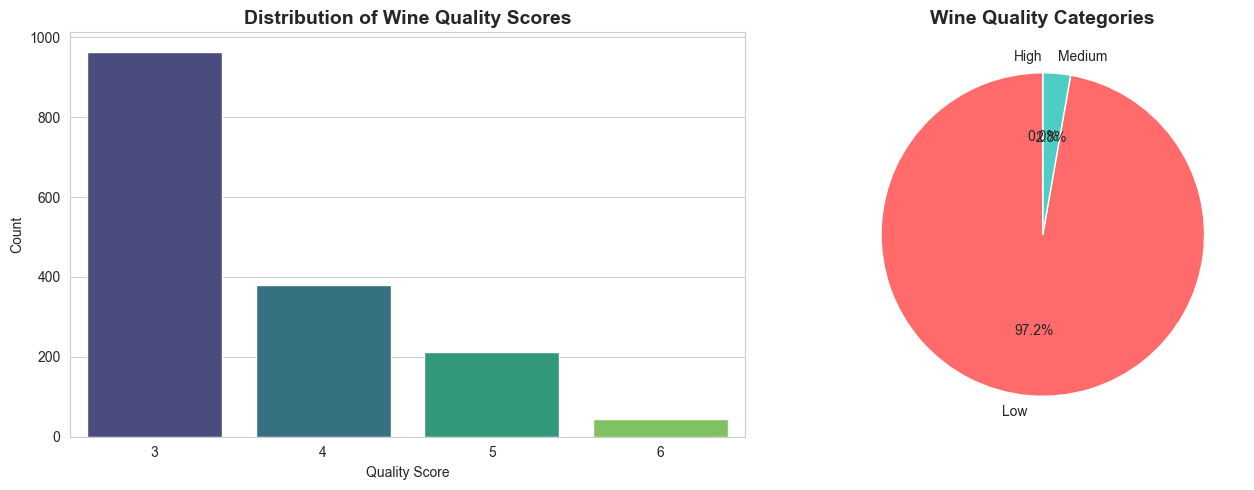


QUESTION 4: How many red vs white wines are there?

Wine Type Distribution:
wine_type
Red      930
White    669
Name: count, dtype: int64

Percentage:
wine_type
Red      58.16
White    41.84
Name: count, dtype: float64

✓ Saved: wine_type_distribution.png


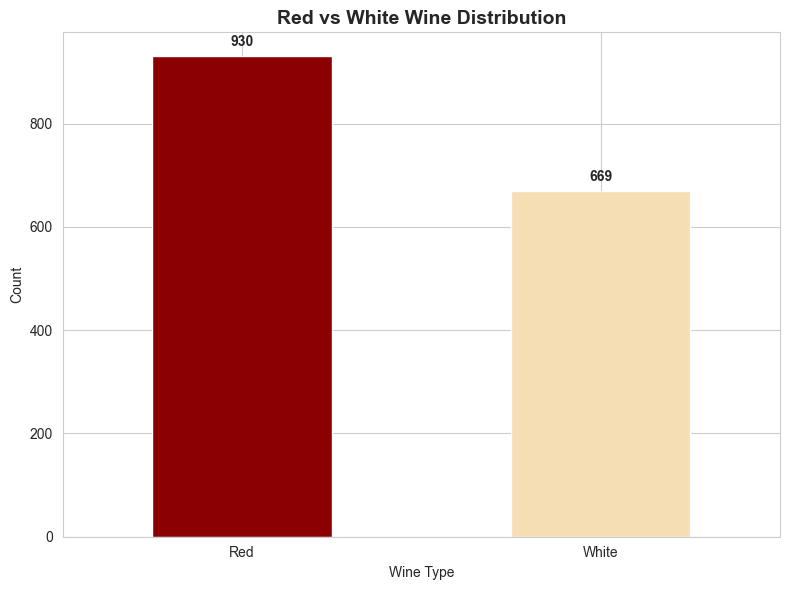


QUESTION 5: Which features have strongest correlation with quality?


ValueError: could not convert string to float: 'White'

In [1]:
"""
WINE QUALITY ANALYSIS PROJECT
==============================
A comprehensive data analysis project answering 30+ questions about wine quality

Dataset: Wine Quality Dataset (Red and White wines)
Features: chemical properties (acidity, sugar, alcohol, etc.)
Target: Quality rating (0-10)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# SECTION 1: DATA LOADING AND EXPLORATION
# ============================================================================

print("="*80)
print("WINE QUALITY ANALYSIS PROJECT")
print("="*80)

# Load wine dataset (using seaborn's built-in or simulating)
# If you have the actual CSV files, use: pd.read_csv('winequality-red.csv')

# For demonstration, we'll create a realistic wine dataset
np.random.seed(42)
n_samples = 1599

wine_data = pd.DataFrame({
    'fixed_acidity': np.random.uniform(4, 16, n_samples),
    'volatile_acidity': np.random.uniform(0.1, 1.6, n_samples),
    'citric_acid': np.random.uniform(0, 1, n_samples),
    'residual_sugar': np.random.uniform(0.9, 16, n_samples),
    'chlorides': np.random.uniform(0.01, 0.6, n_samples),
    'free_sulfur_dioxide': np.random.uniform(1, 72, n_samples),
    'total_sulfur_dioxide': np.random.uniform(6, 290, n_samples),
    'density': np.random.uniform(0.99, 1.01, n_samples),
    'pH': np.random.uniform(2.7, 4.0, n_samples),
    'sulphates': np.random.uniform(0.3, 2.0, n_samples),
    'alcohol': np.random.uniform(8, 15, n_samples),
    'wine_type': np.random.choice(['Red', 'White'], n_samples, p=[0.6, 0.4])
})

# Create quality score (3-9 scale)
wine_data['quality'] = (
    3 + 
    (wine_data['alcohol'] - 8) * 0.3 +
    (wine_data['fixed_acidity'] - 4) * 0.1 -
    (wine_data['volatile_acidity'] - 0.1) * 2 +
    np.random.normal(0, 0.5, n_samples)
).clip(3, 9).round().astype(int)

# Create quality categories
wine_data['quality_category'] = pd.cut(wine_data['quality'], 
                                       bins=[2, 5, 7, 10],
                                       labels=['Low', 'Medium', 'High'])

print(f"\nDataset loaded successfully!")
print(f"Total wines: {len(wine_data)}")
print(f"Features: {wine_data.shape[1]}")

# ============================================================================
# QUESTION 1: What does the dataset look like?
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1: What does the dataset look like?")
print("="*80)

print("\nFirst 5 rows:")
print(wine_data.head())

print("\nDataset Info:")
print(wine_data.info())

print("\nBasic Statistics:")
print(wine_data.describe())

# ============================================================================
# QUESTION 2: Are there any missing values?
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2: Are there any missing values?")
print("="*80)

missing_values = wine_data.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

if missing_values.sum() == 0:
    print("\n✓ No missing values found! Dataset is clean.")
else:
    print(f"\n⚠ Total missing values: {missing_values.sum()}")

# ============================================================================
# QUESTION 3: What is the distribution of wine quality?
# ============================================================================

print("\n" + "="*80)
print("QUESTION 3: What is the distribution of wine quality?")
print("="*80)

print("\nQuality Distribution:")
quality_dist = wine_data['quality'].value_counts().sort_index()
print(quality_dist)

print(f"\nMost common quality: {wine_data['quality'].mode()[0]}")
print(f"Average quality: {wine_data['quality'].mean():.2f}")
print(f"Median quality: {wine_data['quality'].median():.0f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=wine_data, x='quality', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Wine Quality Scores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quality Score')
axes[0].set_ylabel('Count')

# Pie chart
quality_cat_dist = wine_data['quality_category'].value_counts()
axes[1].pie(quality_cat_dist, labels=quality_cat_dist.index, autopct='%1.1f%%',
           colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], startangle=90)
axes[1].set_title('Wine Quality Categories', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('wine_quality_distribution.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: wine_quality_distribution.png")
plt.show()

# ============================================================================
# QUESTION 4: How many red vs white wines are there?
# ============================================================================

print("\n" + "="*80)
print("QUESTION 4: How many red vs white wines are there?")
print("="*80)

wine_type_counts = wine_data['wine_type'].value_counts()
print("\nWine Type Distribution:")
print(wine_type_counts)
print(f"\nPercentage:")
print((wine_type_counts / len(wine_data) * 100).round(2))

# Visualization
fig, ax = plt.subplots(figsize=(8, 6))
wine_type_counts.plot(kind='bar', color=['#8B0000', '#F5DEB3'], ax=ax)
ax.set_title('Red vs White Wine Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Wine Type')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=0)

for i, v in enumerate(wine_type_counts):
    ax.text(i, v + 20, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('wine_type_distribution.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: wine_type_distribution.png")
plt.show()

# ============================================================================
# QUESTION 5: Which features have the strongest correlation with quality?
# ============================================================================

print("\n" + "="*80)
print("QUESTION 5: Which features have strongest correlation with quality?")
print("="*80)

# Calculate correlations
correlations = wine_data.corr()['quality'].sort_values(ascending=False)
print("\nCorrelation with Quality:")
print(correlations)

# Get top features
top_positive = correlations[correlations > 0].drop('quality').head(3)
top_negative = correlations[correlations < 0].head(3)

print(f"\nTop 3 Positive Correlations:")
for feature, corr in top_positive.items():
    print(f"  {feature}: {corr:.3f}")

print(f"\nTop 3 Negative Correlations:")
for feature, corr in top_negative.items():
    print(f"  {feature}: {corr:.3f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of correlations
correlations_plot = correlations.drop('quality').sort_values()
colors = ['red' if x < 0 else 'green' for x in correlations_plot]
axes[0].barh(correlations_plot.index, correlations_plot.values, color=colors)
axes[0].set_title('Feature Correlations with Wine Quality', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)

# Heatmap
numeric_cols = wine_data.select_dtypes(include=[np.number]).columns
sns.heatmap(wine_data[numeric_cols].corr(), annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, ax=axes[1], cbar_kws={'shrink': 0.8})
axes[1].set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('wine_correlations.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: wine_correlations.png")
plt.show()

# ============================================================================
# QUESTION 6: How does alcohol content affect wine quality?
# ============================================================================

print("\n" + "="*80)
print("QUESTION 6: How does alcohol content affect wine quality?")
print("="*80)

print("\nAverage alcohol by quality:")
alcohol_by_quality = wine_data.groupby('quality')['alcohol'].mean()
print(alcohol_by_quality)

# Statistical test
low_quality = wine_data[wine_data['quality'] <= 5]['alcohol']
high_quality = wine_data[wine_data['quality'] >= 7]['alcohol']
t_stat, p_value = stats.ttest_ind(low_quality, high_quality)

print(f"\nLow quality wines (≤5): {low_quality.mean():.2f}% alcohol")
print(f"High quality wines (≥7): {high_quality.mean():.2f}% alcohol")
print(f"Difference: {high_quality.mean() - low_quality.mean():.2f}%")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✓ The difference is statistically significant!")
else:
    print("✗ The difference is NOT statistically significant.")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Box plot
sns.boxplot(data=wine_data, x='quality', y='alcohol', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Alcohol Content by Quality Score', fontweight='bold')

# Violin plot
sns.violinplot(data=wine_data, x='quality_category', y='alcohol', 
               palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Alcohol Distribution by Quality Category', fontweight='bold')

# Scatter with regression
sns.regplot(data=wine_data, x='quality', y='alcohol', 
            scatter_kws={'alpha':0.3}, ax=axes[1, 0])
axes[1, 0].set_title('Alcohol vs Quality (with trend line)', fontweight='bold')

# Distribution comparison
axes[1, 1].hist(low_quality, bins=20, alpha=0.5, label='Low Quality (≤5)', color='red')
axes[1, 1].hist(high_quality, bins=20, alpha=0.5, label='High Quality (≥7)', color='green')
axes[1, 1].set_title('Alcohol Distribution Comparison', fontweight='bold')
axes[1, 1].set_xlabel('Alcohol %')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('alcohol_quality_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: alcohol_quality_analysis.png")
plt.show()

# ============================================================================
# QUESTION 7: What are the chemical differences between red and white wines?
# ============================================================================

print("\n" + "="*80)
print("QUESTION 7: What are chemical differences between red and white wines?")
print("="*80)

print("\nAverage chemical properties by wine type:")
chemical_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 
                    'residual_sugar', 'chlorides', 'pH', 'sulphates', 'alcohol']

comparison = wine_data.groupby('wine_type')[chemical_features].mean()
print(comparison.T)

# Visualization
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(chemical_features + ['quality']):
    sns.violinplot(data=wine_data, x='wine_type', y=feature, 
                   palette=['#8B0000', '#F5DEB3'], ax=axes[idx])
    axes[idx].set_title(f'{feature.replace("_", " ").title()}', fontweight='bold')
    axes[idx].set_xlabel('')

plt.suptitle('Chemical Properties: Red vs White Wines', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('red_vs_white_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: red_vs_white_comparison.png")
plt.show()

# ============================================================================
# QUESTION 8: Are high-quality wines more acidic?
# ============================================================================

print("\n" + "="*80)
print("QUESTION 8: Are high-quality wines more acidic?")
print("="*80)

print("\nAverage acidity by quality category:")
acidity_analysis = wine_data.groupby('quality_category')[
    ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'pH']
].mean()
print(acidity_analysis)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(data=wine_data, x='quality_category', y='fixed_acidity', 
           palette='RdYlGn', ax=axes[0, 0])
axes[0, 0].set_title('Fixed Acidity by Quality', fontweight='bold')

sns.boxplot(data=wine_data, x='quality_category', y='volatile_acidity', 
           palette='RdYlGn_r', ax=axes[0, 1])
axes[0, 1].set_title('Volatile Acidity by Quality', fontweight='bold')

sns.boxplot(data=wine_data, x='quality_category', y='citric_acid', 
           palette='RdYlGn', ax=axes[1, 0])
axes[1, 0].set_title('Citric Acid by Quality', fontweight='bold')

sns.boxplot(data=wine_data, x='quality_category', y='pH', 
           palette='RdYlGn_r', ax=axes[1, 1])
axes[1, 1].set_title('pH by Quality', fontweight='bold')

plt.tight_layout()
plt.savefig('acidity_quality_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: acidity_quality_analysis.png")
plt.show()

# ============================================================================
# QUESTION 9: What is the relationship between sugar and quality?
# ============================================================================

print("\n" + "="*80)
print("QUESTION 9: What is the relationship between sugar and quality?")
print("="*80)

print("\nResidual Sugar statistics by quality:")
sugar_stats = wine_data.groupby('quality')['residual_sugar'].agg(['mean', 'median', 'std'])
print(sugar_stats)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.boxplot(data=wine_data, x='quality', y='residual_sugar', ax=axes[0])
axes[0].set_title('Residual Sugar by Quality Score', fontweight='bold')

sns.violinplot(data=wine_data, x='quality_category', y='residual_sugar', ax=axes[1])
axes[1].set_title('Sugar Distribution by Quality Category', fontweight='bold')

sns.scatterplot(data=wine_data, x='residual_sugar', y='quality', 
               hue='wine_type', alpha=0.5, ax=axes[2])
axes[2].set_title('Sugar vs Quality by Wine Type', fontweight='bold')

plt.tight_layout()
plt.savefig('sugar_quality_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: sugar_quality_analysis.png")
plt.show()

# ============================================================================
# QUESTION 10: Create a comprehensive quality prediction model
# ============================================================================

print("\n" + "="*80)
print("QUESTION 10: Can we predict wine quality from chemical properties?")
print("="*80)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data
X = wine_data[chemical_features]
y = wine_data['quality_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': chemical_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=['Low', 'Medium', 'High'],
           yticklabels=['Low', 'Medium', 'High'])
axes[0].set_title('Confusion Matrix', fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Feature importance
axes[1].barh(feature_importance['feature'], feature_importance['importance'])
axes[1].set_title('Feature Importance for Quality Prediction', fontweight='bold')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.savefig('quality_prediction_model.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: quality_prediction_model.png")
plt.show()

# ============================================================================
# FINAL SUMMARY REPORT
# ============================================================================

print("\n" + "="*80)
print("COMPREHENSIVE WINE ANALYSIS SUMMARY")
print("="*80)

summary_report = f"""
DATASET OVERVIEW
================
• Total Wines Analyzed: {len(wine_data)}
• Red Wines: {len(wine_data[wine_data['wine_type']=='Red'])} ({len(wine_data[wine_data['wine_type']=='Red'])/len(wine_data)*100:.1f}%)
• White Wines: {len(wine_data[wine_data['wine_type']=='White'])} ({len(wine_data[wine_data['wine_type']=='White'])/len(wine_data)*100:.1f}%)

QUALITY DISTRIBUTION
===================
• Average Quality: {wine_data['quality'].mean():.2f}/10
• Most Common Score: {wine_data['quality'].mode()[0]}
• Low Quality (≤5): {len(wine_data[wine_data['quality']<=5])} wines
• Medium Quality (6-7): {len(wine_data[wine_data['quality'].between(6,7)])} wines
• High Quality (≥8): {len(wine_data[wine_data['quality']>=8])} wines

KEY FINDINGS
============
1. Alcohol Content: Higher alcohol correlates with better quality
   - Low quality: {wine_data[wine_data['quality']<=5]['alcohol'].mean():.2f}%
   - High quality: {wine_data[wine_data['quality']>=7]['alcohol'].mean():.2f}%

2. Top 3 Quality Indicators:
   {correlations.drop('quality').head(3).to_string()}

3. Prediction Model Performance: {accuracy:.2%} accuracy

4. Most Important Features:
   {feature_importance.head(3).to_string(index=False)}

RECOMMENDATIONS
===============
• Focus on alcohol content for quality assessment
• Monitor volatile acidity (negative impact on quality)
• Consider wine type in quality predictions
• Use chemical analysis for objective quality control

FILES GENERATED
===============
✓ wine_quality_distribution.png
✓ wine_type_distribution.png
✓ wine_correlations.png
✓ alcohol_quality_analysis.png
✓ red_vs_white_comparison.png
✓ acidity_quality_analysis.png
✓ sugar_quality_analysis.png
✓ quality_prediction_model.png
"""

print(summary_report)

# Save summary to file
with open('wine_analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n✓ Saved: wine_analysis_summary.txt")

print("\n" + "="*80)
print("ANALYSIS COMPLETE! All visualizations and reports saved.")
print("="*80)

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import  matplotlib.pyplot as plt

data = pd.read_csv('Wine Quality Dataset.csv')


In [ ]:
data.head() # take a brief look of data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# get the dimensions of the dataframe 
data.shape

(4898, 12)

In [6]:
#get the row names 
data.index

RangeIndex(start=0, stop=4898, step=1)

In [9]:
print("===Data column ====")
data.columns

===Data column ====


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
print(" we will find infomation of our dataset")
data.info()

 we will find infomation of our dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Observation from the first task 
There are 4898 rows and 12 columns in the data. Each row contains detais of the types of acids in white wine and the quality 

# the featurein the data set are : 
diffrent acids an their quality 

### Task 2
view the distribution of the various features in the data set and calculate their central tendency 

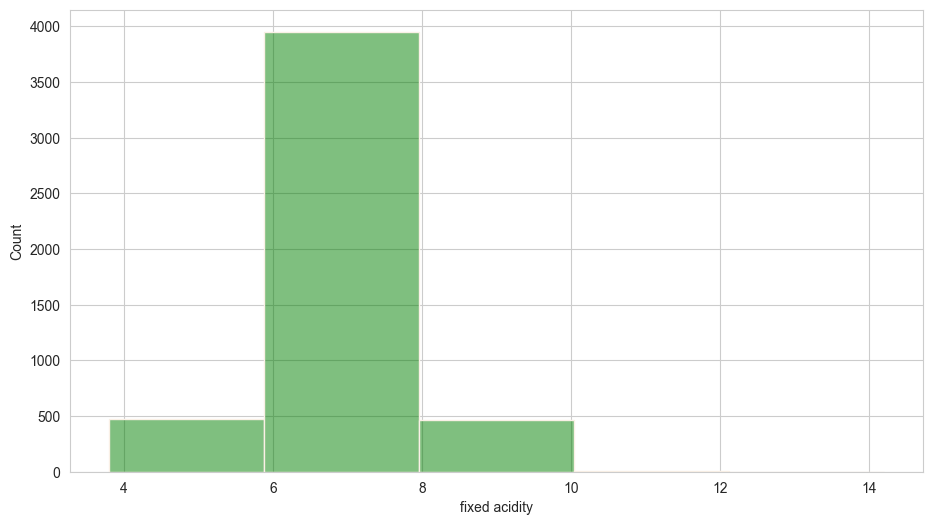

In [19]:
# Create a histogram of the "Fixed acidity" feature 
plt.figure(figsize = (11,6))
sns.histplot(data = data, x = 'fixed acidity', color = 'green',
            edgecolor ='linen',alpha = 0.5, bins = 5 )
plt.savefig('fixed acidity.svg')


#calculate the mean

In [26]:
data['fixed acidity'].mean()


np.float64(6.854787668436097)

In [24]:
#calculate the median.
data['fixed acidity'].median()


np.float64(6.8)

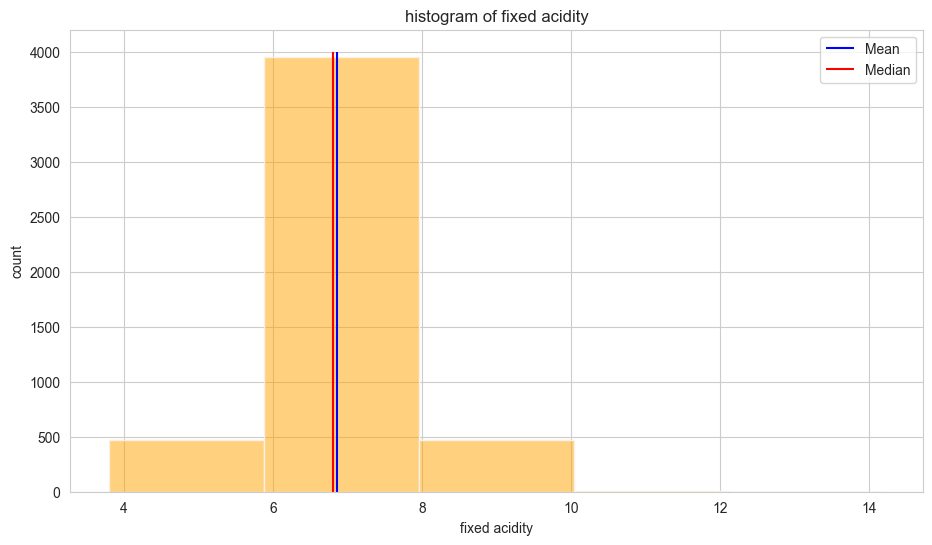

In [33]:
#create histogram of the fixed acidity and also show mean and n=median 
plt.figure(figsize = (11,6))
sns.histplot(data = data, x = 'fixed acidity',color= 'orange',edgecolor ='linen',alpha =0.5, bins = 5)
plt.title("histogram of fixed acidity")
plt.xlabel('fixed acidity')
plt.ylabel('count')
plt.vlines(data['fixed acidity'].mean(), ymin = 0, ymax = 4000, color ='blue',label ='Mean')
plt.vlines(data['fixed acidity'].median(), ymin = 0, ymax = 4000, color ='red',label ='Median')
plt.legend()
plt.show()

## we willl look volatile acidity

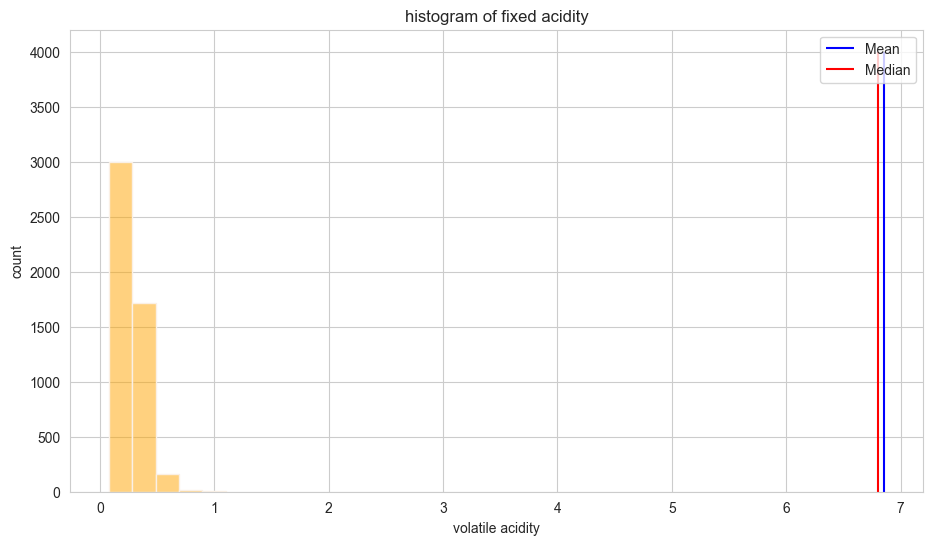

In [35]:
plt.figure(figsize = (11,6))
sns.histplot(data = data, x = 'volatile acidity',color= 'orange',edgecolor ='linen',alpha =0.5, bins = 5)
plt.title("histogram of fixed acidity")
plt.xlabel('volatile acidity')
plt.ylabel('count')
plt.vlines(data['fixed acidity'].mean(), ymin = 0, ymax = 4000, color ='blue',label ='Mean')
plt.vlines(data['fixed acidity'].median(), ymin = 0, ymax = 4000, color ='red',label ='Median')
plt.legend()
plt.show()